# PROBLEM STATEMENT

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #1: IMPORT DATASET

In [2]:
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')

In [3]:
house_df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   
5    101930     1.0           0     0     ...         11        3890   
6      6819     2.0           0     0     ...          7        1715   
7      9711     1.0           0     0     ...          7        1060   
8      7470     1.0           0     0     ...          7        1050   
9      6560     2.0           0     0     ...          7        1890   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   
5           1530      2001             0    98053  47.6561 -122.005   
6              0      1995             0    98003  47.3097 -122.327   
7              0      1963             0    98198  47.4095 -122.315   
8            730      1960             0    98146  47.5123 -122.337   
9              0      2003             0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570  

[10 rows x 21 columns]

In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# STEP #2: VISUALIZE DATASET

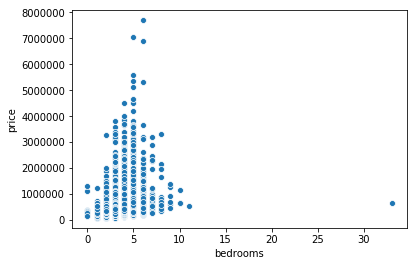

In [5]:
sns.scatterplot(x = 'bedrooms', y = 'price', data = house_df)

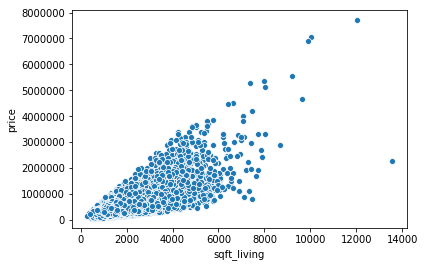

In [6]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = house_df)

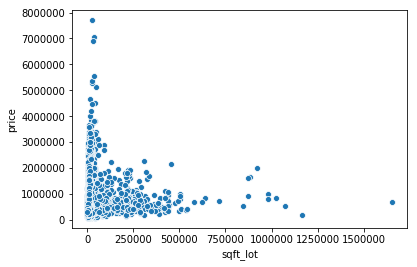

In [7]:
sns.scatterplot(x = 'sqft_lot', y = 'price', data = house_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe350c34828>,
      dtype=object)

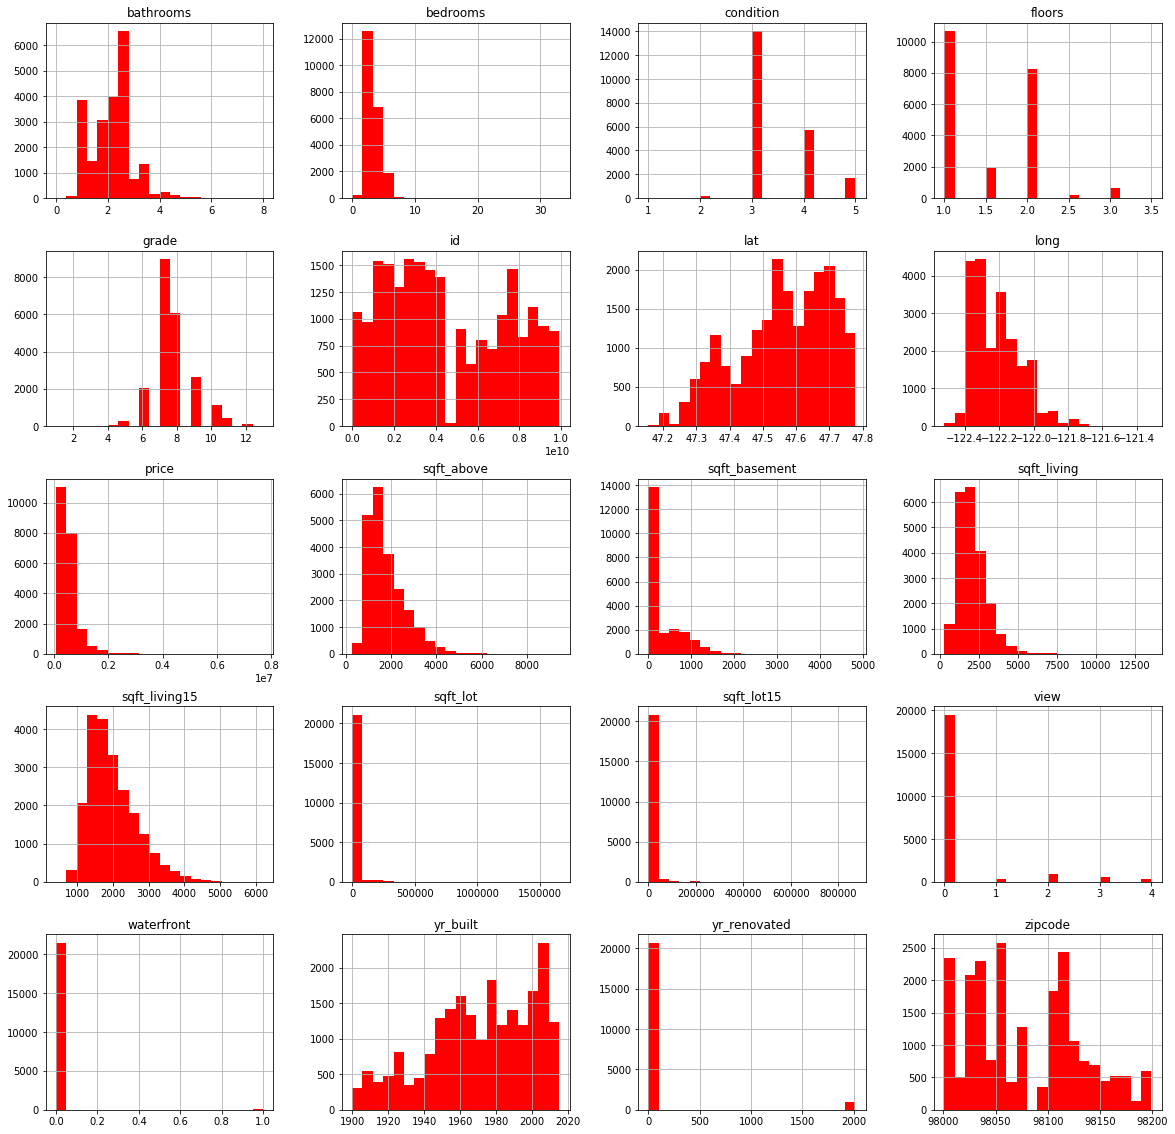

In [8]:
house_df.hist(bins=20,figsize=(20,20), color = 'r')

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [9]:
selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [10]:
X.head(10)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   
5         4       4.50         5420    101930     1.0        3890   
6         3       2.25         1715      6819     2.0        1715   
7         3       1.50         1060      9711     1.0        1060   
8         3       1.00         1780      7470     1.0        1050   
9         3       2.50         1890      6560     2.0        1890   

   sqft_basement  waterfront  view  condition  grade  sqft_above  yr_built  \
0              0           0     0          3      7        1180      1955   
1            400           0     0          3      7        2170      1951   
2              0           0     0          3      6         770      1933   
3            910           0     0          5      7        1050      1965   
4              0           0     0          3      8        1680      1987   
5           1530           0     0          3     11        3890      2001   
6              0           0     0          3      7        1715      1995   
7              0           0     0          3      7        1060      1963   
8            730           0     0          3      7        1050      1960   
9              0           0     0          3      7        1890      2003   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503  
5             0    98053  47.6561 -122.005           4760      101930  
6             0    98003  47.3097 -122.327           2238        6819  
7             0    98198  47.4095 -122.315           1650        9711  
8             0    98146  47.5123 -122.337           1780        8113  
9             0    98038  47.3684 -122.031           2390        7570

In [11]:
y = house_df['price']

In [12]:
y.head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1225000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [13]:
X.shape

(21613, 19)

In [14]:
y.shape

(21613,)

# STEP#4: TRAINING THE MODEL

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 15)

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [-2.75321044e+04  2.98160540e+04  9.92173378e+01  1.26353258e-01
  1.09341527e+04  4.14699323e+01  5.77474056e+01  5.00585954e+05
  4.96503329e+04  2.49615333e+04  9.70074666e+04  4.14699323e+01
 -2.68856103e+03  1.50565364e+01 -7.79612497e+02  5.90385542e+05
 -2.60219004e+05  2.17592797e+01 -4.95150290e-01]
Linear Model Coefficient (b):  21180064.374140076


# STEP #5: EVALUATE MODEL

In [17]:
y_predict = regressor.predict( X_test)
y_predict

array([780122.31185337, 178897.41794908, 411856.37306151, ...,
       791422.84306898, 210205.64075968, 898317.44285364])

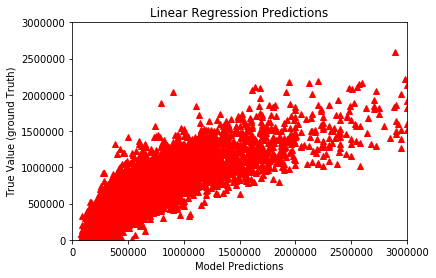

In [18]:
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [19]:
k = X_test.shape[1]
n = len(X_test)

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 200522.645 
MSE = 40209330977.68959 
MAE = 126519.12969516256 
R2 = 0.7013787489482215 
Adjusted R2 = 0.7010502327204418


# RIDGE REGRESSION

In [21]:
from sklearn.linear_model import Lasso, Ridge
regressor_ridge = Ridge(alpha = 50)
regressor_ridge.fit(X_train, y_train)
print('Linear Model Coefficient (m): ', regressor_ridge.coef_)
print('Linear Model Coefficient (b): ', regressor_ridge.intercept_)

y_ridge_predict = regressor_ridge.predict( X_test)
y_ridge_predict

Linear Model Coefficient (m):  [-2.92414546e+04  2.98128363e+04  1.02045384e+02 -3.40387843e-03
  1.85436618e+04  3.72206174e+01  6.48247689e+01  1.77705016e+05
  6.04020494e+04  2.21583968e+04  1.04427899e+05  3.72206173e+01
 -3.08485727e+03  1.80290820e+01 -4.78540604e+02  3.40829161e+05
 -1.23922454e+05  2.31812937e+01 -5.80053370e-01]
Linear Model Coefficient (b):  20912539.394464046


array([747226.79102303, 196560.68995718, 399148.85780829, ...,
       724216.88933108, 218983.64481362, 830759.09823559])

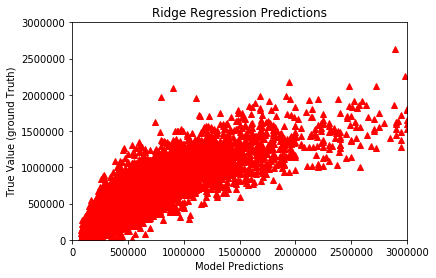

In [22]:
plt.plot(y_test, y_ridge_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_ridge_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_ridge_predict)
MAE = mean_absolute_error(y_test, y_ridge_predict)
r2 = r2_score(y_test, y_ridge_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

RMSE = 206003.521 
MSE = 42437450568.87048 
MAE = 128545.15078185457 
R2 = 0.6848312500559719 
Adjusted R2 = 0.6844845297590039


# LASSO REGRESSION

In [27]:
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 500, tol = 1)
regressor_lasso.fit(X_train,y_train)
print('Linear Model Coefficient (m): ', regressor_lasso.coef_)
print('Linear Model Coefficient (b): ', regressor_lasso.intercept_)

y_lasso_predict = regressor_lasso.predict( X_test)
y_lasso_predict

Linear Model Coefficient (m):  [-1.45865742e+04  1.80157733e+05  1.58793292e+02 -3.05013577e-02
  5.87896237e+03  2.11964343e+01 -7.67518731e+01  4.00806707e+05
  6.48006944e+04  3.27579714e+04  4.75140396e+04 -6.02002513e+01
 -3.24414540e+03  2.96234816e+00 -3.67194205e+02  6.02018706e+05
 -1.52389127e+05  4.98992279e+01 -1.17912447e-01]
Linear Model Coefficient (b):  -5477778.625878664


array([847491.10275234, 183225.79926718, 428300.80375887, ...,
       739067.30137295, 120027.64673157, 817188.66167821])

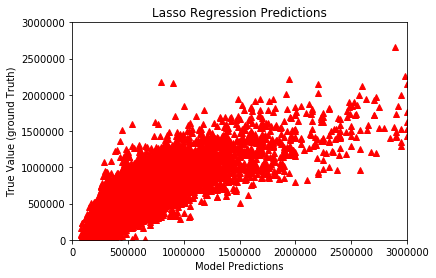

In [28]:

plt.plot(y_test, y_lasso_predict, "^", color = 'r')
plt.xlim(0, 3000000)
plt.ylim(0, 3000000)

plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Lasso Regression Predictions')
plt.show()

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_lasso_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_lasso_predict)
MAE = mean_absolute_error(y_test, y_lasso_predict)
r2 = r2_score(y_test, y_lasso_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 213422.234 
MSE = 45549049807.57026 
MAE = 137784.61043274263 
R2 = 0.6617224433477018 
Adjusted R2 = 0.6613503008211317
